In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = "/content/drive/MyDrive/assi_final_project/training.1600000.processed.noemoticon.csv"

# QUESTION 1: pre-processing and exploring the dataset

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv(data_path, encoding='latin-1', header=None)

df = df[[df.columns[0], df.columns[-1]]]
df.columns = ['labels', 'texts']

labels = df[df.columns[0]]
texts = df[df.columns[-1]]

In [4]:
pos = df.loc[df['labels'] == 4]
neg = df.loc[df['labels'] == 0]

pos.replace(4, 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [5]:
# get only the first 50,000 positive tweets
pos = pos.head(50000)
pos

,labels,texts
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone
...,...,...
849995,1,Now need 8 followers to compleate 1000 Follow...
849996,1,I knew I had to explain something to my friend...
849997,1,done tweeting..... til tomorrow..
849998,1,@cmozilo Act II set is pretty breath-taking -L...


In [6]:
# get only the first 50,000 negative tweets
neg = neg.head(50000)
neg

,labels,texts
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
49995,0,@mileycyrus so i have the same insomnia prob a...
49996,0,20 mintues late for my meeting starting @ 8 h...
49997,0,@kentucky_derby super excited! Are you tweetin...
49998,0,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...


In [7]:
frames = [pos, neg]
data = pd.concat(frames,ignore_index=True)
data

,labels,texts
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone
...,...,...
99995,0,@mileycyrus so i have the same insomnia prob a...
99996,0,20 mintues late for my meeting starting @ 8 h...
99997,0,@kentucky_derby super excited! Are you tweetin...
99998,0,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...


# pre-processing

In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT','rt', 'via', 'the',u'\u2019',u'\u2026','The',u'de',u'\xe9']
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
numbers_re=re.compile(r'(?:(?:\d+,?)+(?:\.?\d+)?)')
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

#function that says which tokens to keep. Used to eliminate words that will not help in classifications
def keepTokens(token):
  if token=='' or token[0]=='@' or token[0:4]=='http' or (token in stop) or numbers_re.search(token):
    return False
  return True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
# pre-processing
def clean_tweets(text):
  tokens = tokens_re.findall(text)
  tokens = filter(keepTokens,tokens) #eliminating tokens that are not useful
  tokens = map(ps.stem,tokens) #stemming the tokens after elimination
  return " ".join(tokens) #return as one string


In [10]:
ps = PorterStemmer()
data['texts']=data.apply(lambda row: clean_tweets(row['texts']),axis=1) #all pre-processing done in here

In [11]:
data

,labels,texts
0,1,I love u guy r best
1,1,im meet one besti tonight cant wait girl talk
2,1,thank twitter add sunisa I got meet hin show D...
3,1,be sick realli cheap hurt much eat real food p...
4,1,effect everyon
...,...,...
99995,0,insomnia prob slept hr woke nd couldnt go back...
99996,0,mintu late meet start how'd I know I go late a...
99997,0,super excit are tweet event happen onli way I ...
99998,0,I want anoth day off To much Sh today got quot...


# Explore the Data

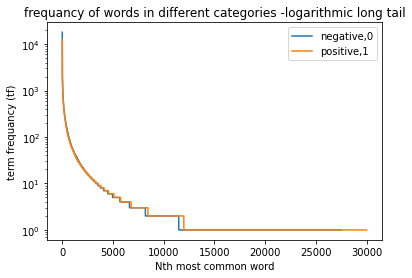

In [12]:
import matplotlib.pyplot as plt

def add_count(target,tokens):
  for token in tokens.split(" "):
    token_counter[target][token]=token_counter[target].get(token,0)+1

token_counter={0:{},1:{}}
# counting all the occurrences of the tokens
data.apply(lambda row: add_count(row['labels'],row['texts']),axis=1)

#sorting results based on frequancy
token_counter[0]=sorted(token_counter[0].items(), key=lambda kv:kv[1],reverse=True)
token_counter[1]=sorted(token_counter[1].items(), key=lambda kv:kv[1],reverse=True)

#plotting first line for negative tokens
x=range(0,len(token_counter[0]))
y=[value for (key,value) in sorted(token_counter[0], key=lambda kv: -kv[1])]
plt.plot(x, y,label="negative,0")

#plotting second line for positive tokens
x=range(0,len(token_counter[1]))
y=[value for (key,value) in sorted(token_counter[1], key=lambda kv: -kv[1])]
plt.plot(x, y,label="positive,1")

plt.title('frequancy of words in different categories -logarithmic long tail')
plt.xlabel('Nth most common word')
plt.ylabel('term frequancy (tf)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()


Most popular terms

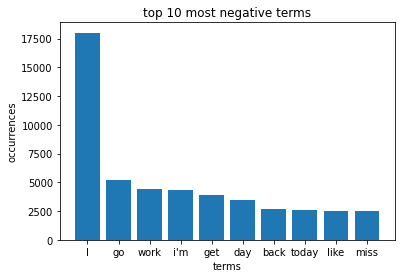

In [13]:
x_neg = [i[0] for i in token_counter[0][:10]]
y_neg = [i[1] for i in token_counter[0][:10]]

plt.bar(x_neg,y_neg)
plt.title("top 10 most negative terms")
plt.ylabel('occurrences')
plt.xlabel('terms')
plt.show()


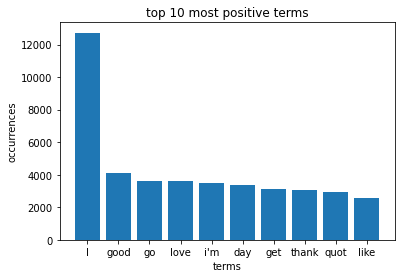

In [14]:
x_pos = [i[0] for i in token_counter[1][:10]]
y_pos = [i[1] for i in token_counter[1][:10]]
plt.bar(x_pos,y_pos)
plt.title("top 10 most positive terms")
plt.ylabel('occurrences')
plt.xlabel('terms')
plt.show()

#QUESTION 2: data training and evaluating

split to train set and test set

In [15]:
from keras.preprocessing import sequence

#in order to split train,validation and test we used this function with data-split ratio of 0.8
def split(data_split):
  train_percent=0.8 
  msk = np.random.rand(len(data_split)) < 0.8
  return data_split[msk],data_split[~msk]

#collecting all vocabulary tokens
vocab= set()
vocab.update(i[0] for i in token_counter[0] if i[1] >299 )
vocab.update(i[0] for i in token_counter[1]  if i[1] >299)
vocab_to_int = {w:i+1 for i, w in enumerate(vocab)}


In [16]:
#parsing to number series
def tweet_to_series(tweet):
  words=tweet.split()
  return list(map(lambda x:vocab_to_int[x] if x in vocab_to_int  else 299,words))

data['encoded']=data.apply(lambda row: tweet_to_series(row['texts']),axis=1)


In [17]:
#splitting the data into 3 parts.
train , test = split(data)
train, val = split(train)

corpus_train=[text for text in train['texts']] #crating the records for TRAIN-SET
corpus_val=[text for text in val['texts']] #crating the records for VALIDATION-SET
corpus_test = [text for text in test['texts']]  #crating the records for TEST-SET

#for keras model:
max_length = 300
X_train_K = sequence.pad_sequences(train['encoded'], maxlen=max_length)
X_validation_K = sequence.pad_sequences(val['encoded'], maxlen=max_length)
X_test_K = sequence.pad_sequences(test['encoded'], maxlen=max_length)
X_train_K

array([[  0,   0,   0, ..., 186, 131, 193],
       [  0,   0,   0, ..., 229,  99, 299],
       [  0,   0,   0, ...,  99, 198, 299],
       ...,
       [  0,   0,   0, ..., 299, 299, 299],
       [  0,   0,   0, ...,   0,   0, 139],
       [  0,   0,   0, ...,  74, 279, 107]], dtype=int32)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer after tuning hyper-parameters
vectorizer = TfidfVectorizer(min_df=0.001,max_features=500)

#turning tweets to numeric vectors
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_validation = vectorizer.transform(corpus_val).toarray()

#turning labels to numeric values in binary
Y_train = np.asarray([0 if text==0 else 1 for text in train['labels']])
Y_validation=np.asarray([0 if text==0 else 1 for text in val['labels']])

In [19]:
#adding test records
X_test = vectorizer.transform(corpus_test).toarray()
Y_test=np.asarray([0 if text==0 else 1 for text in test['labels']])

print("num of attributes",str(len(vectorizer.get_feature_names())))

num of attributes 500


**LSTM**

In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense,Dropout,Flatten,Bidirectional,Embedding,RepeatVector,Input,concatenate,Reshape,Concatenate
input_dim = X_train_K.shape[1]

#model layers creation
model_lstm = Sequential()
model_lstm.add(Embedding(300, 32, input_length=max_length))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           9600      
_________________________________________________________________
dropout (Dropout)            (None, 300, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 62,901
Trainable params: 62,901
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model_lstm.fit(X_train_K, Y_train,epochs=10,verbose=1,validation_data=(X_validation_K, Y_validation), batch_size=2048)

Epoch 1/10
32/32 [==============================] - 253s 8s/step - loss: 0.6895 - accuracy: 0.5456 - val_loss: 0.6543 - val_accuracy: 0.5985
Epoch 2/10
32/32 [==============================] - 292s 9s/step - loss: 0.6295 - accuracy: 0.6634 - val_loss: 0.5738 - val_accuracy: 0.7092
Epoch 3/10
32/32 [==============================] - 241s 8s/step - loss: 0.5677 - accuracy: 0.7067 - val_loss: 0.5475 - val_accuracy: 0.7230
Epoch 4/10
32/32 [==============================] - 241s 8s/step - loss: 0.5510 - accuracy: 0.7152 - val_loss: 0.5446 - val_accuracy: 0.7206
Epoch 5/10
32/32 [==============================] - 252s 8s/step - loss: 0.5497 - accuracy: 0.7120 - val_loss: 0.5393 - val_accuracy: 0.7258
Epoch 6/10
32/32 [==============================] - 241s 8s/step - loss: 0.5467 - accuracy: 0.7176 - val_loss: 0.5398 - val_accuracy: 0.7242
Epoch 7/10
32/32 [==============================] - 241s 8s/step - loss: 0.5452 - accuracy: 0.7148 - val_loss: 0.5373 - val_accuracy: 0.7250
Epoch 8/10
32

**train and test accuracy**

In [22]:
print("train acc: ",model_lstm.evaluate(X_train_K,Y_train))
print("test acc: ",model_lstm.evaluate(X_test_K,Y_test))

2003/2003 [==============================] - 119s 59ms/step - loss: 0.5374 - accuracy: 0.7197
train acc:  [0.5373874306678772, 0.7196828722953796]
618/618 [==============================] - 37s 59ms/step - loss: 0.5403 - accuracy: 0.7193
test acc:  [0.5402931571006775, 0.7192556858062744]


# Random Forest

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=0, n_jobs=-1)
model.fit(X_train,Y_train)
predictions=model.predict(X_validation)

In [24]:
print("val acc:",accuracy_score(Y_validation, predictions))

val acc: 0.6905160131326271


**train and test accuracy**

In [25]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
print("train acc: ",accuracy_score(Y_train, predict_train))
print("test acc: ",accuracy_score(Y_test, predict_test))

train acc:  0.6895023485900657
test acc:  0.6824939320388349


# Q3

In [ ]:
!pip3 install tweepy
import tweepy
from tweepy import OAuthHandler
import json

consumer_key = '7p1vZahHcDsQ3kYVFf1G5CJAA'
consumer_secret = 'JYjhsCSUgwtY1wnB8nPNuFE1uGezgjzOqMe8QeKqciiELuTxpw'
access_token = '1347526998776807424-ULSbLrEgZXXZcDHm3cPzRVjDSGv0cN'
access_secret = 'GIWZ8QcvgS9GLDMmzevrr7Ecy6ryXOlR0MkcAecZ3OcLg'

In [ ]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
twitter_test_list = []

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
  def on_status(self, status):
        print(status.text)
  def on_data(self, data):
        try:
          y = json.loads(data)
          print(len(twitter_test_list))
          twitter_test_list.append(y['text']) #adding the new tweet to the list
          if len(twitter_test_list) == 15000: #knowing to stop at 15000 that this is our limit
            return False
          return True
        except BaseException as e:
            # print("Error on_data: %s" % str(e))
            pass
        return True
  
  def on_error(self, status):
        print(status)
        return True

myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

#filter the tweets by using common words to get English only random tweets LIVE
myStream.filter(track=['nature','wild'])
# print(len(twitter_test_list))

In [ ]:
print(len(twitter_test_list))

In [ ]:
# remove not necessary /n
twitter_test_list_better = [x.replace('\n',"") for x in twitter_test_list]

In [ ]:
#we added option to write to file so we can debug without mining a lot from twitter.
i = 1
with open('twitter_test_list.txt', 'w') as f:
  for item in twitter_test_list_better:
    print(i)
    i=i+1
    f.write("%s\n" % item)
    


In [ ]:
with open('/content/drive/MyDrive/assi_final_project/twitter_test_list.txt') as f:
    twitter_test_list_from_txt = f.read().splitlines()
    

In [ ]:
# put the tweets in data frame
twitter_test_list_df = pd.DataFrame(twitter_test_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
twitter_test_list_df

,texts
0,Da fuq?
1,Post-pandemic goal (for Autumn or Spring not W...
2,RT @404_MyCity: The wild thing is Chloe &amp; ...
3,RT @DanSevush: Stacey Abrams is a force of nat...
4,I’m going to post a video of someone live feed...
...,...
14995,RT @LivinShidaLife: The way African adults jud...
14996,RT @ESPNFC: This Messi stat is wild 🤯 https://...
14997,RT @CauseWereGuys: This was a wild era https:/...
14998,here’s your reminder that holistic health IS s...


In [ ]:
#pre-processing tweets
twitter_test_list_df['texts']=twitter_test_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

# Tag the tweets

In [27]:
with open('/content/drive/MyDrive/assi_final_project/twitter_test_list.txt') as f:
    twitter_test_list_from_txt = f.read().splitlines()

In [28]:
# put the tweets in data frame
twitter_test_list_df = pd.DataFrame(twitter_test_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [29]:
twitter_test_list_df

,texts
0,Da fuq?
1,Post-pandemic goal (for Autumn or Spring not W...
2,RT @404_MyCity: The wild thing is Chloe &amp; ...
3,RT @DanSevush: Stacey Abrams is a force of nat...
4,I’m going to post a video of someone live feed...
...,...
14995,RT @LivinShidaLife: The way African adults jud...
14996,RT @ESPNFC: This Messi stat is wild 🤯 https://...
14997,RT @CauseWereGuys: This was a wild era https:/...
14998,here’s your reminder that holistic health IS s...


In [30]:
positive_vocab = [
    'good', 'nice', 'great', 'awesome', 'outstanding','impressive','new','fantastic',
     'terrific','nice', 'like', 'love','lovely','cool', 'triumph', 'triumphal',
     'triumphant', 'victory','beautiful', 'cool', 'delightful', 
     'exciting','excellent', 'fun', 'happy', 'paradise', 'perfect'
     'positive', 'remarkable', 'smile', 'thrilling', 'well', 'wow', 'wonderful', 'yes',
     'adaptable','adaptive', 'adequate', 'adjustable', 'advantages', 'affection', 'agreeable', 
     'amaze', 'amazed', 'amazement', 'amazes' ,'amazing', 'amazingly', 'adorable', 'awesomely', 'awesomeness',
     'beauty', 'beloved', 'benefit', 'benefits', 'best', 'better', 'bless', 'blessing', 'bliss', 'blissful',
     'bonus', 'calm' ,'calming', 'calmness', 'celebrate', 'celebrated','celebration', 'clarity', 'classic',
     'clean','cleaner','cleanest', 'clear', 'colorful', 'comfort', 'comfortable','correct', 'cure', 'dawn', 
     'delicious','delight','delighted','delightful','delightfully','delightfulness', 'easy', 'enjoy',
     'enjoyable', 'enjoyably', 'enjoyed', 'enjoying', 'enjoys', 'excitement', 'fair', 'fast', 'favorite', 
     'fine', 'freedom', 'fresh', 'generous', 'gentle', 'glow', 'grand' ,'greatest', 'hail', 'harmless',
     'harmony', 'healthy', 'heaven', 'helpful', 'helping', 'hot', 'improvement', 'improve', 'improved',
     'incredible', 'inspiring', 'joy', 'joyful', 'keen', 'keenly', 'kindly', 'legendary', 'liked', 'likes',
     'loved', 'loves', 'loyal', 'lucky', 'magical', 'magnificent', 'merry', 'neat', 'noble', 'optimism', 
     'optimistic', 'perfect', 'perfection', 'perfectly', 'pleasant','pleasantly', 'pleased', 'pleasing', 
     'pleasingly', 'pretty' ,'priceless', 'pure', 'quiet', 'relaxed', 'renown', 'renowned', 'rich',
     'right' ,'free' , 'safe', 'satisfied','satisfies','satisfy','satisfying','satisified', 'sexy', 'silent', 
     'smiles','smiling', 'success' ,'super', 'sweet', 'useful', 'warm' , 'wealthy','welcome', 'wholesome',
     'win', 'winner', 'wisdom','wise', ''
      ]

negative_vocab = [
    'bad', 'terrible', 'crap', 'useless', 'hate', 'defeat', 'angry', 'annoy', 'awful',
    'boring', 'cry', 'dirty', 'disgusting', 'not' , 'evil', 'fear', 'filthy',
    'gross', 'hurt', 'horrible', 'hideous', 'injure', 'lose', 'mean', 'monstrous', 'no', 'negative',
    'poison', 'sad', 'scary', 'stormy', 'ugly', 'unpleasant', 'upset', 'wound', 'zero',
    'abnormal', 'absurd', 'abuse', 'abused', 'ache', 'afraid', 'agonies', 'anger', 'anti-', 'anxiety',
    'anxious', 'attack', 'badly', 'badly', 'betray', 'beware', 'bias', 'bleeding', 'blind', 'bored',
     'break', 'breaks', 'broke', 'brutally', 'bugs', 'bullies', 'burning', 'cannibal', 'chaos', 'clumsy',
     'cold', 'collapse', 'complicated', 'complex', 'confused', 'corrupt', 'corrupted', 'creepy', 'crime', 
     'criminal', 'crisis', 'cruel', 'damage', 'damaged', 'dark', 'dead', 'decay', 'deformed', 'demise',
      'denying', 'depress', 'died', 'dies', 'dirt', 'disable', 'disappointed', 'disaster', 'discord', 'disgusting',
      'dislike', 'dismay', 'dragged', 'embarrassing', 'embarrassment', 'endanger', 'enemies', 'enemy', 'fail', 'failed',
      'fake', 'fall', 'false', 'fatal', 'fatalistic', 'fever', 'flaws', 'flaw', 'fool', 'forsake', 'freeze', 'furious', 
      'furiously', 'garbage', 'gloom', 'greasy', 'hard', 'harm', 'harmed', 'hate', 'hated', 'hell', 'horrified', 'idiots',
      'idiot', 'ill', 'impulsive', 'inflame', 'inhuman', 'injury', 'insane', 'instable', 'ironic', 'irony', 'itch', 'itching',
      'isolate', 'isolated', 'isolation', 'killed', 'lack', 'lame', 'lazy', 'leaking', 'leaks', 'lethal', 'life-threatening', 
      'lonely', 'loner', 'lost', 'loud', 'menace', 'mess', 'messy', 'murder', 'nemesis', 'noise', 'noises', 'omit', 'panic', 
      'paralize', 'paralyzed', 'pollute', 'polution', 'poor', 'problem', 'punch', 'rage', 'raped', 'reject', 'revenge', 'risks',
      'risk', 'rotten', 'rude', 'ruins', 'sadness', 'scare', 'scars', 'scream', 'severe', 'shame', 'shark', 'sick', 'sickness', 
      'slap', 'slow', 'smoke', 'sore', 'sorry', 'stinks', 'stormy', 'strange', 'stubborn', 'stupid', 'suck', 'tangled', 'terror', 
      'troubles', 'unwell', 'upseting', 'useless', 'vain', 'weak', 'worry', 'worse', 'wrong']

In [31]:
def tokenize(s):
    #return tokens_re.findall(s.encode('ascii','replace'))
    return tokens_re.findall(s)
 
def get_tweet_sentiment(tweet):
  tokens = tokenize(tweet)
  neg_counter = 0
  pos_counter = 0
  for token in tokens:
    if token in positive_vocab:
      pos_counter = pos_counter + 1
    if token in negative_vocab:
      neg_counter = neg_counter + 1
  if pos_counter > neg_counter:
    return 1
  if pos_counter < neg_counter:
    return -1
  else:
    return 0

In [32]:
#calling the labeling function
twitter_test_list_df['label'] = twitter_test_list_df.apply(lambda row: get_tweet_sentiment(row['texts']),axis=1) 

In [33]:
twitter_test_list_df

,texts,label
0,Da fuq?,0
1,Post-pandemic goal (for Autumn or Spring not W...,-1
2,RT @404_MyCity: The wild thing is Chloe &amp; ...,0
3,RT @DanSevush: Stacey Abrams is a force of nat...,-1
4,I’m going to post a video of someone live feed...,0
...,...,...
14995,RT @LivinShidaLife: The way African adults jud...,-1
14996,RT @ESPNFC: This Messi stat is wild 🤯 https://...,0
14997,RT @CauseWereGuys: This was a wild era https:/...,0
14998,here’s your reminder that holistic health IS s...,0


In [34]:
positive_tweets = twitter_test_list_df.loc[twitter_test_list_df['label'] == 1]
negative_tweets = twitter_test_list_df.loc[twitter_test_list_df['label'] == -1]

In [35]:
positive_tweets

,texts,label
16,RT @SatyamDixit_: The pure genius of #HinduTem...,1
21,RT @vangoghmuseum: ‘If I felt no love for natu...,1
22,It’s wild how every country has a better natio...,1
31,RT @joshtpm: Apart from the larger arguments a...,1
35,"RT @GeorgianLords: ""It [is] the duty of a wise...",1
...,...,...
14977,RT @melaniietweets: @SilverstoneNeil @desertmo...,1
14980,RT @Peach_Nref: Pink tulips (🌷) are known for ...,1
14981,RT @BrooklynnNoir: I kissed a girl and liked i...,1
14989,I’ll take a quality knockoff jersey quick! Esp...,1


In [36]:
negative_tweets

,texts,label
1,Post-pandemic goal (for Autumn or Spring not W...,-1
3,RT @DanSevush: Stacey Abrams is a force of nat...,-1
7,RT @HedgingChaos: Critical lack of adversarial...,-1
24,RT @NatureAstronomy: Anirudh Chiti et al. reve...,-1
28,nature of jealousy is insults; denying me in f...,-1
...,...,...
14966,RT @jmnbee: ❤🤍🖤BTS - DARK &amp; WILD ALBUM GIV...,-1
14973,I hate snow ❄️ 😡 🖕🏻Mother Nature ! #snowsnowgo...,-1
14976,RT @microBIOblog: El SARSCoV2 se transmite por...,-1
14986,Your carefully simulated science is no match f...,-1


In [37]:
#pre-processing tweets
twitter_test_list_df['texts']=twitter_test_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

**popular terms for each sentiment**

In [38]:
import matplotlib.pyplot as plt

def add_count(target,tokens):
  for token in tokens.split(" "):
    token_counter[target][token]=token_counter[target].get(token,0)+1

token_counter={0:{},1:{},-1:{}}
# counting all the occurrences of the tokens
twitter_test_list_df.apply(lambda row: add_count(row['label'],row['texts']),axis=1)
token_counter[0]=sorted(token_counter[0].items(), key=lambda kv:kv[1],reverse=True)
token_counter[1]=sorted(token_counter[1].items(), key=lambda kv:kv[1],reverse=True)
token_counter[-1]=sorted(token_counter[-1].items(), key=lambda kv:kv[1],reverse=True)

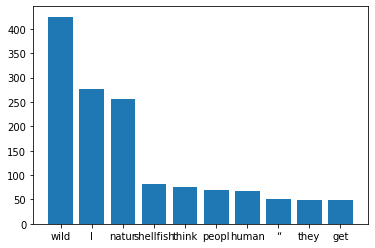

In [39]:
x_neg = [i[0] for i in token_counter[-1][:10]]
y_neg = [i[1] for i in token_counter[-1][:10]]
plt.bar(x_neg,y_neg)
plt.show()

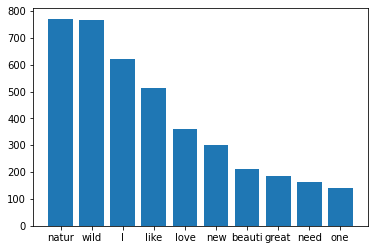

In [40]:
x_pos = [i[0] for i in token_counter[1][:10]]
y_pos = [i[1] for i in token_counter[1][:10]]
plt.bar(x_pos,y_pos)
plt.show()

# QUESTION 4: predicting tweets using Machine Learning

In [41]:
vocab= set()
vocab.update(i[0] for i in token_counter[0] if i[1] >299 )
vocab.update(i[0] for i in token_counter[1]  if i[1] >299)
vocab_to_int = {w:i+1 for i, w in enumerate(vocab)}

twitter_test_list_df['encoded']=data.apply(lambda row: tweet_to_series(row['texts']),axis=1)


In [42]:
corpus=[text for text in twitter_test_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_test_list_df['encoded'], maxlen=max_length)

In [43]:
#adding test records
Y_test=np.asarray([0 if text==0 else 1 for text in twitter_test_list_df['label']])

In [44]:
print("test acc: ",model_lstm.evaluate(X_test_K,Y_test))

469/469 [==============================] - 30s 64ms/step - loss: 0.7855 - accuracy: 0.2750
test acc:  [0.7855219841003418, 0.2750000059604645]


# QUESTION 5: aggregation and google trends

## Collecting tweets

In [ ]:
!pip3 install tweepy
import tweepy
from tweepy import OAuthHandler
import json

consumer_key = '7p1vZahHcDsQ3kYVFf1G5CJAA'
consumer_secret = 'JYjhsCSUgwtY1wnB8nPNuFE1uGezgjzOqMe8QeKqciiELuTxpw'
access_token = '1347526998776807424-ULSbLrEgZXXZcDHm3cPzRVjDSGv0cN'
access_secret = 'GIWZ8QcvgS9GLDMmzevrr7Ecy6ryXOlR0MkcAecZ3OcLg'

In [ ]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
twitter_test_list = []

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
  def on_status(self, status):
        print(status.text)
  def on_data(self, data):
        try:
          y = json.loads(data)
          print(len(twitter_test_list))
          twitter_test_list.append(y['text']) #adding the new tweet to the list
          # if len(twitter_test_list) == 15000: #knowing to stop at 15000 that this is our limit
          #   return False
          return True
        except BaseException as e:
            # print("Error on_data: %s" % str(e))
            pass
        return True
  
  def on_error(self, status):
        print(status)
        return True

myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

#filter the tweets by using common words to get English only random tweets LIVE
myStream.filter(track=['nature','wild'])
# print(len(twitter_test_list))

In [ ]:
twitter_test_list_better = [x.replace('\n',"") for x in twitter_test_list]

In [ ]:
# writing the tweets to txt file
i = 1
with open('fifth_day.txt', 'w') as f:
  for item in twitter_test_list_better:
    print(i)
    i=i+1
    f.write("%s\n" % item)

## Getting the tweets we collected

In [ ]:
with open('/content/drive/MyDrive/assi_final_project/first_day.txt') as f:
    twitter_first_day_list_from_txt = f.read().splitlines()

In [ ]:
# put the tweets in data frame
twitter_first_day_list_df = pd.DataFrame(twitter_first_day_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
#pre-processing tweets
twitter_first_day_list_df['texts']=twitter_first_day_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

In [ ]:
with open('/content/drive/MyDrive/assi_final_project/second_day.txt') as f:
    twitter_second_day_list_from_txt = f.read().splitlines()

In [ ]:
# put the tweets in data frame
twitter_second_day_list_df = pd.DataFrame(twitter_second_day_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
#pre-processing tweets
twitter_second_day_list_df['texts']=twitter_second_day_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

In [ ]:
with open('/content/drive/MyDrive/assi_final_project/third_day.txt') as f:
    twitter_third_day_list_from_txt = f.read().splitlines()

In [ ]:
# put the tweets in data frame
twitter_third_day_list_df = pd.DataFrame(twitter_third_day_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
#pre-processing tweets
twitter_third_day_list_df['texts']=twitter_third_day_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

In [ ]:
with open('/content/drive/MyDrive/assi_final_project/forth_day.txt') as f:
    twitter_forth_day_list_from_txt = f.read().splitlines()

In [ ]:
# put the tweets in data frame
twitter_forth_day_list_df = pd.DataFrame(twitter_forth_day_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
#pre-processing tweets
twitter_forth_day_list_df['texts']=twitter_forth_day_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

In [ ]:
with open('/content/drive/MyDrive/assi_final_project/fifth_day.txt') as f:
    twitter_fifth_day_list_from_txt = f.read().splitlines()

In [ ]:
# put the tweets in data frame
twitter_fifth_day_list_df = pd.DataFrame(twitter_fifth_day_list_from_txt,columns=["texts"]) #adding tweets to a dataframe

In [ ]:
#pre-processing tweets
twitter_fifth_day_list_df['texts']=twitter_fifth_day_list_df.apply(lambda row: clean_tweets(row['texts']),axis=1) 

## Graph of tweets per day

<BarContainer object of 5 artists>

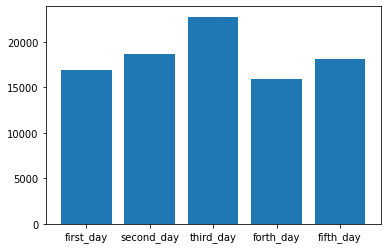

In [ ]:
import matplotlib.pyplot as plt
list_days = ['first_day', 'second_day', 'third_day', 'forth_day', 'fifth_day']
list_count_tweets = [twitter_first_day_list_df.shape[0], twitter_second_day_list_df.shape[0], twitter_third_day_list_df.shape[0], twitter_forth_day_list_df.shape[0], twitter_fifth_day_list_df.shape[0]]
plt.bar(list_days, list_count_tweets)

## Sentiment prediction and ratio of positive per day

In [ ]:
vocab= set()
vocab.update(i[0] for i in token_counter[0] if i[1] >299 )
vocab.update(i[0] for i in token_counter[1]  if i[1] >299)
vocab_to_int = {w:i+1 for i, w in enumerate(vocab)}

twitter_first_day_list_df['encoded']=twitter_first_day_list_df.apply(lambda row: tweet_to_series(row['texts']),axis=1)

In [ ]:
corpus=[text for text in twitter_first_day_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_first_day_list_df['encoded'], maxlen=max_length)

In [ ]:
res = model_lstm.predict(X_test_K)

In [ ]:
positive_count_first = 0
for i in range(len(res)):
    if res[i] < 0.5:
      res[i] = 0
    else:
      positive_count_first = positive_count_first + 1
      res[i] = 1

In [ ]:
ratio = positive_count_first / len(res)
print("ratio of positive words for the first day:")
print(ratio)

ratio of positive words for the first day:
0.5285358329378262


In [ ]:
twitter_second_day_list_df['encoded']=twitter_second_day_list_df.apply(lambda row: tweet_to_series(row['texts']),axis=1)

In [ ]:
corpus=[text for text in twitter_second_day_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_second_day_list_df['encoded'], maxlen=max_length)

In [ ]:
res = model_lstm.predict(X_test_K)

In [ ]:
positive_count_second = 0
for i in range(len(res)):
    if res[i] < 0.5:
      res[i] = 0
    else:
      positive_count_second = positive_count_second + 1
      res[i] = 1

In [ ]:
ratio = positive_count_second / len(res)
print("ratio of positive words for the second day:")
print(ratio)

ratio of positive words for the second day:
0.5386182130031624


In [ ]:
twitter_third_day_list_df['encoded']=twitter_third_day_list_df.apply(lambda row: tweet_to_series(row['texts']),axis=1)

In [ ]:
corpus=[text for text in twitter_third_day_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_third_day_list_df['encoded'], maxlen=max_length)

In [ ]:
res = model_lstm.predict(X_test_K)

In [ ]:
positive_count_third = 0
for i in range(len(res)):
    if res[i] < 0.5:
      res[i] = 0
    else:
      positive_count_third = positive_count_third + 1
      res[i] = 1

In [ ]:
ratio = positive_count_third / len(res)
print("ratio of positive words for the third day:")
print(ratio)

ratio of positive words for the third day:
0.5713971687329641


In [ ]:
twitter_forth_day_list_df['encoded']=twitter_forth_day_list_df.apply(lambda row: tweet_to_series(row['texts']),axis=1)

In [ ]:
corpus=[text for text in twitter_forth_day_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_forth_day_list_df['encoded'], maxlen=max_length)

In [ ]:
res = model_lstm.predict(X_test_K)

In [ ]:
positive_count_forth = 0
for i in range(len(res)):
    if res[i] < 0.5:
      res[i] = 0
    else:
      positive_count_forth = positive_count_forth + 1
      res[i] = 1

In [ ]:
ratio = positive_count_forth / len(res)
print("ratio of positive words for the forth day:")
print(ratio)

ratio of positive words for the forth day:
0.4792177576557882


In [ ]:
twitter_fifth_day_list_df['encoded']=twitter_fifth_day_list_df.apply(lambda row: tweet_to_series(row['texts']),axis=1)

In [ ]:
corpus=[text for text in twitter_fifth_day_list_df['texts']]

#for keras model:
max_length = 300
X_test_K = sequence.pad_sequences(twitter_fifth_day_list_df['encoded'], maxlen=max_length)

In [ ]:
res = model_lstm.predict(X_test_K)

In [ ]:
positive_count_fifth = 0
for i in range(len(res)):
    if res[i] < 0.5:
      res[i] = 0
    else:
      positive_count_fifth = positive_count_fifth + 1
      res[i] = 1

In [ ]:
ratio = positive_count_fifth / len(res)
print("ratio of positive words for the fifth day:")
print(ratio)

ratio of positive words for the fifth day:
0.4599691221879135


## Graph of positive per day

<BarContainer object of 5 artists>

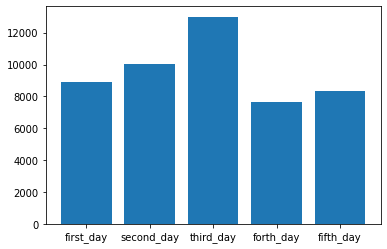

In [ ]:
import matplotlib.pyplot as plt
list_days = ['first_day', 'second_day', 'third_day', 'forth_day', 'fifth_day']
list_count_psitive_per_days = [positive_count_first, positive_count_second, positive_count_third, positive_count_forth, positive_count_fifth]
plt.bar(list_days, list_count_psitive_per_days)

## Graph from google trends

red represent natuer and blue represent wild.

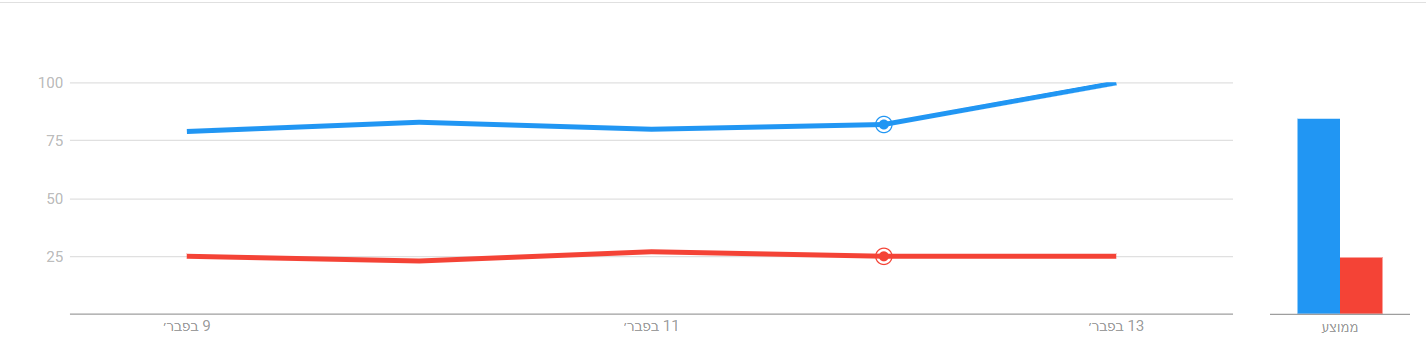

### tweet counts per day and positive tweet counts per day Pearson Correlation

In [ ]:
import numpy as np

paerson = np.corrcoef(list_count_psitive_per_days, list_count_tweets)
print(paerson)

[[1.         0.95398905]
 [0.95398905 1.        ]]


### tweet counts per day and google search per day Pearson Correlation

In [ ]:
list_count_from_google_trends = [110, 119, 114, 111, 126]

In [ ]:
paerson = np.corrcoef(list_count_from_google_trends, list_count_tweets)
print(paerson)

[[1.         0.16137248]
 [0.16137248 1.        ]]


positive tweet counts per day and google search per day Pearson Correlation

In [ ]:
paerson = np.corrcoef(list_count_from_google_trends, list_count_psitive_per_days)
print(paerson)

[[1.         0.00725715]
 [0.00725715 1.        ]]
